In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
import random

# import standard scalaer and PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
# Import gene_expression_data
gene_expression_data = pd.read_csv('../data/gene_expression_data.csv', index_col=0)

gene_expression_data = gene_expression_data.T

In [7]:
# print 100 columns
gene_expression_data


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,state
GSM7500908_S001.Cel.gz,1.991753,1.833722,1.912692,2.073776,1.519752,1.986452,1.847715,1.802307,1.840064,1.723922,...,2.149521,2.230193,2.251607,1.747516,1.696212,1.590868,1.495337,1.571371,1.587489,0.0
GSM7500909_S002.Cel.gz,1.937690,1.768114,1.893755,2.085172,1.518073,1.946138,1.867105,1.797446,1.711680,1.710876,...,2.083528,2.205562,2.211680,1.739111,1.673752,1.607489,1.472455,1.549625,1.579007,0.0
GSM7500910_S003.Cel.gz,1.990510,1.866362,1.918364,2.070910,1.547763,2.013225,1.861550,1.774874,1.853479,1.728025,...,2.166791,2.250496,2.257596,1.717381,1.634054,1.571400,1.493446,1.546728,1.538763,0.0
GSM7500911_S004.Cel.gz,1.987602,1.881270,1.912562,2.074178,1.558817,2.001957,1.861156,1.797882,1.713875,1.752625,...,2.176181,2.254407,2.257640,1.745163,1.674409,1.592537,1.486525,1.556564,1.602627,0.0
GSM7500912_S005.Cel.gz,1.966236,1.824364,1.944169,2.070846,1.532569,1.941797,1.869277,1.803378,1.656557,1.706622,...,2.167809,2.261370,2.261119,1.775522,1.694159,1.601726,1.476219,1.557719,1.626127,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7501261_P035.Cel.gz,1.978353,1.894578,1.889361,2.019680,1.503159,2.026477,1.896477,1.711211,1.864008,1.735217,...,2.208913,2.260018,2.263036,1.716538,1.706110,1.556235,1.503223,1.544848,1.579930,1.0
GSM7501262_P036.Cel.gz,1.989805,1.920842,1.892247,2.002799,1.493967,2.064307,1.853743,1.764472,1.925057,1.682989,...,2.167054,2.240679,2.239990,1.733541,1.660435,1.621529,1.516674,1.546254,1.546413,1.0
GSM7501263_P037.Cel.gz,1.994683,1.943394,1.887191,2.017943,1.517037,2.065549,1.872838,1.725730,2.079884,1.743610,...,2.179946,2.240154,2.245086,1.733308,1.741827,1.587347,1.532752,1.568462,1.556432,1.0
GSM7501264_P038.Cel.gz,1.958665,1.915329,1.843298,2.025811,1.524983,2.016468,1.814617,1.722552,2.005236,1.778549,...,2.177909,2.243858,2.245124,1.742403,1.675067,1.578046,1.490103,1.571326,1.549100,1.0


In [4]:

# add column named state with progressing or stable if row contains _P or _S
for index, row in gene_expression_data.iterrows():
    if '_P' in index:
        gene_expression_data.loc[index, 'state'] = 1
    elif '_S' in index:
        gene_expression_data.loc[index, 'state'] = 0


## Flags for changing setting

- `no-minsampling` : Disable min-sampling
- `no-log2` : Disable log2

In [5]:
NO_MINSAMPLING = False
NO_LOG2 = False


In [6]:
if NO_LOG2 == False:
    gene_expression_data = np.log2(gene_expression_data + 1)

In [8]:

# set random seed
random.seed(90)



# undersample the data
# get the number of rows with state 0
state_0 = gene_expression_data[gene_expression_data['state'] == 0]
state_1 = gene_expression_data[gene_expression_data['state'] == 1]

# get the number of rows with state 1
state_0_count = state_0.shape[0]
state_1_count = state_1.shape[0]

# get the minimum number of rows
min_count = min(state_0_count, state_1_count)

# get the same number of rows for each state
state_0 = state_0.sample(min_count)
state_1 = state_1.sample(min_count)

# concatenate the two dataframes
gene_expression_data = pd.concat([state_0, state_1])


# shuffle rows of gene_expression_data
gene_expression_data = shuffle(gene_expression_data)

#train_data.shape, test_data.shape # 50 - 14 - 14 split
train_data = gene_expression_data.iloc[:50, :]
valid_data = gene_expression_data.iloc[50:64, :]
# Rest to the test data
test_data = gene_expression_data.iloc[64:, :]


""" train_data = gene_expression_data.iloc[:220, :]
valid_data = gene_expression_data.iloc[220:280, :]
# Rest to the test data
test_data = gene_expression_data.iloc[300:, :]
 """
#shape
# count state in the three datasets

    

# get the train and valid data
X_train = train_data
y_train = train_data['state']

X_valid = valid_data
y_valid = valid_data['state']

In [9]:

probeset_names = ["234764_x_at", "211835_at", "1561937_x_at", "202716_at",
                  "235305_s_at", "210538_s_at", "237461_at", "41660_at", "217892_s_at", 
                  "225822_at", "57532_at", "213489_at", "222641_s_at", "205159_at",
                  "209012_at", "220522_at", "223709_s_at", "36129_at",
                  "201848_s_at", "212704_at", "213622_at", "232531_at", 
                  "205666_at", "210789_x_at", "217809_at", "225291_at", 
                  "226488_at", "231131_at", "238662_at", "226098_at", "202387_at",
                  "228217_s_at", "225553_at", "223995_at", "202613_at", "203200_s_at"]

## Fitness function proposal for unbalanced data


$$
F_{\text{proposed}} = \frac{\sum_{\text{majority}} |\text{dist}_{\text{major}_i}|^2}{2 \times N_{\text{majority}}} + \frac{\sum_{\text{minority}} |\text{dist}_{\text{minor}_i}|^2}{2 \times N_{\text{minority}}}
$$

Where
- $N_{\text{majority}}$ is the number of samples in the majority class
- $N_{\text{minority}}$ is the number of samples in the minority class
- $\text{dist}_{\text{major}_i}$ is the distance of prediction of the $i$-th sample in the majority class to the decision boundary
- $\text{dist}_{\text{minor}_i}$ is the distance of prediction of the $i$-th sample in the minority class to the decision boundary

In [10]:
# How to we measure the distance between the data points when doing a binary classification?
# Assuming the data are scaled, we can use the euclidean distance



In [11]:
def train_and_evaluate_rf(train_data, valid_data, selected_genes_set):
    
    # get the selected genes and state
    temp_train_data = train_data.loc[:, selected_genes_set]
    
    # train the model
    rf = RandomForestClassifier(n_estimators=300, max_depth=100, random_state=120)
    rf.fit(temp_train_data, y_train)
    
    # evaluate the model
    accuracy = rf.score(X_valid.loc[:, selected_genes_set], y_valid)
    
    return accuracy

            

In [12]:
def train_and_evaluate_SVC(train_data, valid_data, selected_genes_set):


    # get the selected genes and state
    temp_train_data = train_data.loc[:, selected_genes_set]
    
    # train the model
    svc = SVC(kernel='linear', C=1)
    svc.fit(temp_train_data, y_train)
    
    # evaluate the model
    accuracy = svc.score(X_valid.loc[:, selected_genes_set], y_valid)
    
    # for each of the datapoint compute the distacnce to the hyperplane
    # get the support vectors
    support_vectors = svc.support_vectors_
    # get the coefficients
    coef = svc.coef_
    
    # get the distance of each point to the hyperplane
    distance_minority_class = []
    distance_majority_class = []
    
    for index, row in X_valid.iterrows():
        # get the distance of the point to the hyperplane
        distance = np.dot(coef, row[selected_genes_set].values)
        if y_valid.loc[index] == 0:
            distance_majority_class.append(distance)
        else:
            distance_minority_class.append(distance)

    return accuracy, distance_minority_class, distance_majority_class

In [13]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.svm import SVC

def fscore(maj_distances, min_distances):
    # print(len(maj_distances),len(min_distances))
    return (sum(maj_distances)**2 / 2*len(maj_distances)) + ((sum(min_distances)**2) / 2*len(min_distances))
    
    
def train_and_evaluate_SVC_kfold(data, selected_genes_set, n_splits=4):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    accuracies = []
    scores=[]

    for train_index, valid_index in skf.split(data[selected_genes_set], data['state']): # replace 'target_column' with the name of your target column
        X_train, X_valid = data.iloc[train_index], data.iloc[valid_index]
        y_train, y_valid = X_train['state'], X_valid['state'] # replace 'target_column' with the name of your target column
        
        # get the selected genes
        temp_X_train = X_train.loc[:, selected_genes_set]
        temp_X_valid = X_valid.loc[:, selected_genes_set]
        
        # train the model
        svc = SVC(kernel='linear', C=10)
        svc.fit(temp_X_train, y_train)
        
        # evaluate the model
        accuracy = svc.score(temp_X_valid, y_valid)
        accuracies.append(accuracy)
        
        # for each datapoint compute the distance to the hyperplane
        # get the support vectors
        support_vectors = svc.support_vectors_
        # get the coefficients
        coef = svc.coef_
        
        # get the distance of each point to the hyperplane
        distance_minority_class = []
        distance_majority_class = []
        
        for index, row in temp_X_valid.iterrows():
            # get the distance of the point to the hyperplane
            distance = np.dot(coef, row.values)[0]
            if y_valid.loc[index] == 0:  # Assuming minority class is labeled as 0
                distance_majority_class.append(distance)
            else:
                distance_minority_class.append(distance)
        scores.append(fscore(distance_majority_class,distance_minority_class))
    
    

    return np.mean(accuracies), np.mean(scores)


In [14]:
train_and_evaluate_SVC_kfold(train_data, probeset_names)

(0.782051282051282, 426165.4713285313)

In [15]:
# select only list of genes from the data
all_genes = gene_expression_data.columns[:-1]

# convert to a list
all_genes = all_genes.tolist()

In [16]:
import pygad 

# let's try to use pygad for selecting features (in this case our genes in gene_expression_data),
# we know that the following probeset_names are quite good for classification

# we are doing a classification problem, so we can use the following probeset_names as initial features and
# then add more from the dataset

probeset_names = ["234764_x_at", "211835_at", "1561937_x_at", "202716_at",
                  "235305_s_at", "210538_s_at", "237461_at", "41660_at", "217892_s_at", 
                  "225822_at", "57532_at", "213489_at", "222641_s_at", "205159_at",
                  "209012_at", "220522_at", "223709_s_at", "36129_at",
                  "201848_s_at", "212704_at", "213622_at", "232531_at", 
                  "205666_at", "210789_x_at", "217809_at", "225291_at", 
                  "226488_at", "231131_at", "238662_at", "226098_at", "202387_at",
                  "228217_s_at", "225553_at", "223995_at", "202613_at", "203200_s_at"]


# try to search over all the possible sets using pygad by starting from probeset_names

# Fitness function used in the paper: A novel fitness function
# in genetic programming for medical data classification

import numpy as np
import pygad
from numpy.random import RandomState

random_seed = 1234
state = RandomState(random_seed)

def fitness_function(ga_instance, solution, solution_idx):
    
    
    mask = np.zeros(len(all_features), dtype=bool)
    
    solution_indices = np.where(solution)[0]
    mask[solution_indices] = 1
    selected_features = np.array(all_features)[mask].tolist()
    
    """
    # change mask such that we mask solution out of all_features
    mask = np.zeros(len(all_features))
    # Set to 1 only the indexes where solution is 1
    mask[solution == 1] = 1
   
    # Apply the mask
    selected_features = np.array(all_features)[mask.astype(bool)].tolist()
    """
    
    num_selected_genes = 100
  
    # Create a random mask selecting out of all_features only num_selected_genes then apply the mask and take only 
    # the selected genes into a list
    
    # 1. Random mask
    #mask = np.zeros(len(all_features))  # Create a mask of all False
    #mask[:num_selected_genes] = 1  # Set the first 'num_features' elements to True
    # shuffle the mask
    #np.random.shuffle(mask)
    
    # 2. Apply the mask
    #selected_features =  np.array(all_features)[mask.astype(bool)].tolist()
    
    #print(selected_features) 
     
    
    # Train a model using the subset of genes and evaluate its performance
    # You would need to replace this with your own model training and evaluation code
    
    #accuracy = train_and_evaluate_rf(train_data=train_data, valid_data=valid_data, selected_genes_set=selected_features)
    accuracy, score = train_and_evaluate_SVC_kfold(data=train_data, selected_genes_set=selected_features)
    

    return score

# Step 2: Define your gene list
gene_list = probeset_names

# remove the genese in gene_list from the dataframe
remaining_genes = gene_expression_data.drop(gene_list, axis=1)

remaining_genes_with_state = remaining_genes.copy()
remaining_genes = remaining_genes.drop('state', axis=1)

all_features = remaining_genes.columns.tolist()

def on_start(ga_instance):
    print("on_start")

def on_fitness(ga_instance, last_gen_fitness):
    print("on_fitness")

def on_generation(ga_instance):
   
   print("on_generation number {0}".format(ga_instance.generations_completed))
   print("Best solution fitness: {0}".format(ga_instance.best_solution()[1]))
    
    
def on_stop(ga_instanse, last_gen_fitness):
    print("on_stop")


# put this to 100 will search in the first 100
added_genes = len(all_features)

# probset names + added_genes is the len of the subset we are going to use
m = added_genes

# number of genes to select
num_genes = 80

# init with random subset of genes in total_genes
gene_space = state.random_integers(0, 1, m)

parent_selection_type = "sss"
keep_parents = 2

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 20

# Step 3: Create an instance of the pygad.GA class
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=30,
                       fitness_func=fitness_function,
                       sol_per_pop=30,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=float,
                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_generation=on_generation,
                       on_stop=on_stop,
                       random_seed=random_seed) 

                       

C:\Users\cenzo\AppData\Local\Temp\ipykernel_44012\3221696633.py:113: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  gene_space = state.random_integers(0, 1, m)
C:\Users\cenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


on_start
on_fitness
on_generation number 1
Best solution fitness: 169749.50216433994
on_fitness
on_generation number 2
Best solution fitness: 173969.72702353823
on_fitness
on_generation number 3
Best solution fitness: 173969.72702353823
on_fitness
on_generation number 4
Best solution fitness: 173969.72702353823
on_fitness
on_generation number 5
Best solution fitness: 202099.11267097355
on_fitness
on_generation number 6
Best solution fitness: 228461.08196020516
on_fitness
on_generation number 7
Best solution fitness: 228461.08196020516
on_fitness
on_generation number 8
Best solution fitness: 239524.28400697274
on_fitness
on_generation number 9
Best solution fitness: 239524.28400697274
on_fitness
on_generation number 10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best solution fitness: 239524.28400697274
on_stop


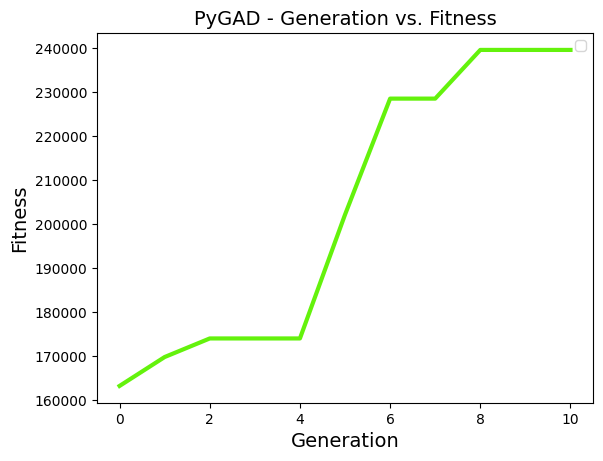

Best solution:  [1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0.]
Best solution fitness:  239524.28400697274
Best solution index:  0


In [17]:
# Step 4: Run the GA
ga_instance.run()

ga_instance.plot_fitness()
# Step 5: Get the best solution and its fitness value
solution, best_solution_fitness, best_match_idx  = ga_instance.best_solution()
# get the best subset by taking the solution with 80 genes
#best_gene_subset = [gene_list[i] for i, gene in enumerate(solution) if np.any(gene == 1)]


print("Best solution: ", solution)
print("Best solution fitness: ", best_solution_fitness)
print("Best solution index: ", best_match_idx)

#print("Best subset of genes:", best_gene_subset)



In [18]:
# retrieve the best solution 
mask = np.where(solution == 1)[0]
selected_features = np.array(all_features)[mask]

print("Selected features: ", selected_features)

Selected features:  ['1007_s_at' '121_at' '1255_g_at' '1294_at' '1316_at' '1320_at' '1431_at'
 '1552256_a_at' '1552258_at' '1552263_at' '1552264_a_at' '1552266_at'
 '1552271_at' '1552272_a_at' '1552274_at' '1552275_s_at' '1552276_a_at'
 '1552277_a_at' '1552278_a_at' '1552286_at' '1552287_s_at' '1552288_at'
 '1552293_at' '1552295_a_at' '1552296_at' '1552299_at' '1552301_a_at'
 '1552304_at' '1552306_at' '1552307_a_at' '1552311_a_at' '1552312_a_at'
 '1552314_a_at' '1552315_at' '1552316_a_at' '1552319_a_at' '1552320_a_at'
 '1552322_at' '1552325_at' '1552327_at' '1552330_at' '1552332_at'
 '1552337_s_at' '1552340_at' '1552343_s_at' '1552344_s_at' '1552348_at']


In [19]:
# get selected features and train from scratch another model to evaluate its performance
selected_features_final = selected_features.tolist() + gene_list



## Trying Random Forest on all features

In [20]:
# Get data using only selected_features_final columns
train_data_final = train_data.loc[:, selected_features_final]
valid_data_final = valid_data.loc[:, selected_features_final]
test_data_final = test_data.loc[:, selected_features_final]

# only selected
train_data_selected = train_data.loc[:, selected_features]
valid_data_selected = valid_data.loc[:, selected_features]
test_data_selected = test_data.loc[:, selected_features]


In [21]:

# train the model


# create a random forest classifier
rf = RandomForestClassifier(n_estimators=500, random_state=4, max_depth=300, criterion='gini', bootstrap=True)
rf_selected = RandomForestClassifier(n_estimators=500, random_state=4, max_depth=300, criterion='gini', bootstrap=True)
# use the list
rf_probeset_names = RandomForestClassifier(n_estimators=500, random_state=4, max_depth=300, criterion='gini', bootstrap=True)

# fit the model
rf.fit(train_data_final, y_train)
rf_selected.fit(train_data_selected, y_train)
rf_probeset_names.fit(train_data.loc[:, probeset_names], y_train)

# evaluate the model
accuracy = rf.score(valid_data_final, y_valid)
accuracy_selected = rf_selected.score(valid_data_selected, y_valid)
accuracy_probeset_names = rf_probeset_names.score(valid_data.loc[:, probeset_names], y_valid)

# shapes


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Validation 

Accuracy:  0.7857142857142857
Accuracy selected:  0.7857142857142857
Accuracy probeset names:  0.7142857142857143
Recall:  0.8571428571428571
Recall selected:  0.8571428571428571
Recall probeset names:  0.8571428571428571
F1:  0.7999999999999999
F1 selected:  0.7999999999999999
F1 probeset names:  0.75
Number of selected genes:  83
Number of selected genes:  47
Number of selected genes:  36


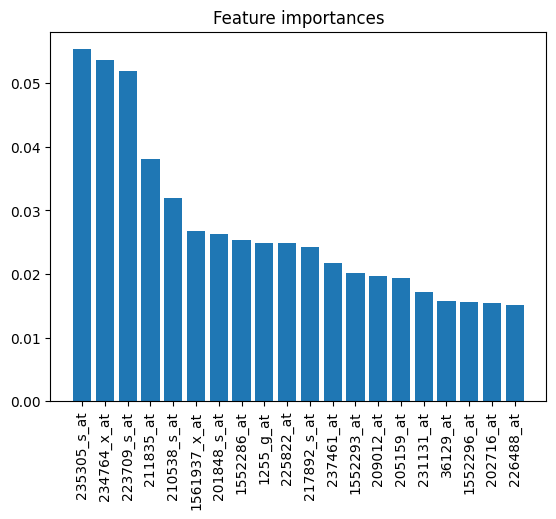

In [23]:
# get the predictions
predictions = rf.predict(test_data_final)
predictions_selected = rf_selected.predict(test_data_selected)
predictions_probeset_names = rf_probeset_names.predict(test_data.loc[:, probeset_names])

# get the accuracy
accuracy = accuracy_score(test_data['state'], predictions)
accuracy_selected = accuracy_score(test_data['state'], predictions_selected)
accuracy_probeset_names = accuracy_score(test_data['state'], predictions_probeset_names)

# get the recall
recall = recall_score(test_data['state'], predictions)
recall_selected = recall_score(test_data['state'], predictions_selected)
recall_probeset_names = recall_score(test_data['state'], predictions_probeset_names)

# get the f1 score
f1 = f1_score(test_data['state'], predictions)
f1_selected = f1_score(test_data['state'], predictions_selected)
f1_probeset_names = f1_score(test_data['state'], predictions_probeset_names)

print("Accuracy: ", accuracy)

print("Accuracy selected: ", accuracy_selected)

print("Accuracy probeset names: ", accuracy_probeset_names)

print("Recall: ", recall)

print("Recall selected: ", recall_selected)

print("Recall probeset names: ", recall_probeset_names)

print("F1: ", f1)

print("F1 selected: ", f1_selected)

print("F1 probeset names: ", f1_probeset_names)

print("Number of selected genes: ", len(selected_features_final))

print("Number of selected genes: ", len(selected_features))

print("Number of selected genes: ", len(probeset_names))

# get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_data['state'], predictions)

# get the feature importances
feature_importances = rf.feature_importances_

# get the indices of the features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# get the names of the features
names = [selected_features_final[i] for i in indices]

# plot the feature importances (show only the top 20)
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), feature_importances[indices][:20])
plt.xticks(range(20), names[:20], rotation=90)
plt.show()

#plt.bar(range(len(selected_features_final)), feature_importances[indices])

#plt.xticks(range(len(selected_features_final)), names, rotation=90)
plt.show()


